**<font color='blue' size = 5>Neural Networks and Deep Learning <font>**

In this Program you will use **Deep Neural Networks** to classify digits in the **mnist** dataset. This database contains a large number of handwritten digits popularly used to train various image processing systems. The training data contains images of the hand written digits and the test data contains labes (0-9) for the digits. 

**<font color='blue' size = 5>Part 1: Training and evaluating deep Neural Networks <font>**

#### As always, we will start by downloading the necessary libraries 

In [1]:
# Libaries for the deep NN
# from keras.layers import Dense

import tensorflow as tf
from tensorflow import keras


# other libraries
import matplotlib.pyplot as plt
import numpy as np

#### Load dataset

In [2]:
# Load mnist data into train and test sets
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# Size of the datatset
print('There are ', len(X_train), ' images in the training and ', len(X_test), ' images in the test dataset')  

There are  60000  images in the training and  10000  images in the test dataset


In [4]:
# Shape of the training data
X_train[0].shape  # The images are in a 28X28 grid

(28, 28)

#### To have an idea about how the training data looks, we will print out the first instance of the training dataset

In [5]:
X_train[0]  # prints out the 1st image in the training set in grid format (28X28 matrix)
# Here 0 means black spaces/cells, 255 is white. So he closer the numbers are to 255 the brighter it gets  

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### Print out what the instance looks like as an image

In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

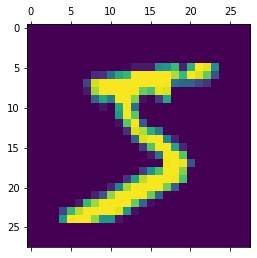

In [7]:
plt.matshow(X_train[0])  # prints out the 1st image in the training set

#### Checking the label of that instance

In [8]:
y_train[0]  # Class/label of the 1st image (the labels are 0-9)

5

### Now, let's build a simple Neural Network with no hidden layers 

In [9]:
model = keras.models.Sequential([                 # initialize the model
    keras.layers.Flatten(input_shape=(28, 28)),   # flatten the training set matrices into 1d arrays
    keras.Input(shape=(784,)),                    # input layer (shape became 784 after flattening)
    keras.layers.Dense(10, activation='sigmoid')  # output layer
])

In [10]:
model.summary() # gives you a summary of the model that has been built

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 input_1 (InputLayer)        multiple                  0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


#### Complile the model

In [12]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

#### Fit the model with X_train and y_train

In [13]:
training_original = model.fit(X_train, y_train, batch_size=100, epochs=20) # epochs indicate the number of times the model has gone through the whole training dataset
                                                       # batch_size (default 32) is the number of training sample the model goes through at a time before updating the model

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 11.1729 - accuracy: 0.8217
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 4.9584 - accuracy: 0.8783
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 4.0813 - accuracy: 0.8844
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 3.7285 - accuracy: 0.8870
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 3.5444 - accuracy: 0.8877
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 3.2817 - accuracy: 0.8889
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 3.0844 - accuracy: 0.8912
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 3.1115 - accuracy: 0.8910
Epoch 9/20
600/600 [==============================] - 1s 2ms/step - loss: 2.9403 - accuracy: 0.8909
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 2.8248 - accuracy: 0.892

#### Test the model with X_test and y_test

In [14]:
evaluation_original = model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 0s 2ms/step - loss: 3.5597 - accuracy: 0.8929


In [15]:
accuracy_train_original = training_original.history['accuracy'][len(training_original.history['accuracy']) - 1]
loss_train_original = training_original.history['loss'][len(training_original.history['loss']) - 1]
accuracy_test_original = evaluation_original[1]
loss_test_original = evaluation_original[0]

Here, you can see that at the simplest state, with no hidden layers, the Neural Network achieves a training accuracy of around **89%** and a test accuracy of around **87%** (may vary each time). For the training set, the accuracy of the model improves with each epoch and the loss decreases.

**<font color='red' size = 4>You will do the rest of the program yourself. Follow the instructions given below to complete the assignment.</font>**

### Add hidden layers to your neural network

#### Add 2/3 hidden layers to your neural network. Set the activation functions for those layers as ReLU.
- #### Compile the new model (name it something other than 'model')
- #### Fit and evaluate the new model and record the accuracy.
- #### Compare the difference between train and test accuracies

In [16]:
# your code here
new_model = keras.models.Sequential([               
    keras.layers.Flatten(input_shape=(28, 28)),   
    keras.Input(shape=(784,)),                    
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
    keras.layers.Dense(10, activation='selu'),
    keras.layers.Dense(20, activation='sigmoid')  
])

In [17]:
new_model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [18]:
new_training = new_model.fit(X_train, y_train, batch_size=100, epochs=20) 

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 2.2160 - accuracy: 0.2226
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 1.7115 - accuracy: 0.3328
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 1.3924 - accuracy: 0.3761
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 1.3491 - accuracy: 0.3788
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 1.3269 - accuracy: 0.3871
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 1.3113 - accuracy: 0.3893
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 1.2983 - accuracy: 0.4024
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 1.2582 - accuracy: 0.4433
Epoch 9/20
600/600 [==============================] - 1s 2ms/step - loss: 1.1967 - accuracy: 0.4697
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 1.1628 - accuracy: 0.4844

In [19]:
new_evaluation = new_model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 0s 2ms/step - loss: 0.9615 - accuracy: 0.5736


In [20]:
accuracy_training = new_training.history['accuracy'][len(new_training.history['accuracy']) - 1]
loss_training = new_training.history['loss'][len(new_training.history['loss']) - 1]
accuracy_test = new_evaluation[1]
loss_test = new_evaluation[0]

#### In our own words, write how the accuracies for the new model differed from that of the previous one.
- #### Why do you think the accuracy improved/worsened?
- #### What is the importance of hidden layers in a Neural Network?

<font color='green' size = 2>Write answer here<font>

Basically, an artificial neural network consists of an input layer where it receives inputs and output layer where it outputs. The hidden layer is a layer which is hidden in between input and output layers since the output of one layer is the input of another layer. 
The hidden layers perform computations on the weighted inputs and produce net input which is then applied with activation functions to produce the actual output. The computations that the hidden layers perform (the way the hidden layers are setup) and the activation functions used depend on the type of neural network used which in turn depends on the application.



**<font color='blue' size = 5>Part 2: Avoiding Overfitting Through Regularization<font>**

#### Chapter 11 of the textbook demonstrates two methods of avoiding overfitting through regularization.
- #### ℓ2 Regularization, and
- #### Dropout
#### You will use both methods and see how the performance changes for the model.  
#### See the Avoiding Overfitting Through Regularization section of the textbook (p. 364)

In [22]:
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

# other libraries
from functools import partial
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pandas as pd

In [23]:
# your code for implementing and evaluating l2 regularization
RegulaziedDense = partial(keras.layers.Dense,
                         kernel_initializer='he_normal',
                         kernel_regularizer=keras.regularizers.l2(0.05))

l2_model = keras.models.Sequential([               
    keras.layers.Flatten(input_shape=(28, 28)),   
    keras.Input(shape=(784,)),                    
    RegulaziedDense(30),
    RegulaziedDense(20),
    RegulaziedDense(10),
    keras.layers.Dense(10, activation='sigmoid')  
])

# Compiling new model
l2_model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [24]:
training_l2 = new_model.fit(X_train, y_train, batch_size=100, epochs=20)
evaluation_l2 = new_model.evaluate(X_test, y_test, batch_size=100)

accuracy_training_l2 = training_l2.history['accuracy'][len(training_l2.history['accuracy']) - 1]
loss_training_12 = training_l2.history['loss'][len(training_l2.history['loss']) - 1]
accuracy_test_l2 = evaluation_l2[1]
loss_test_l2 = evaluation_l2[0]

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.9515 - accuracy: 0.5787
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.9349 - accuracy: 0.5831
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.9506 - accuracy: 0.5787
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.9454 - accuracy: 0.5810
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.9499 - accuracy: 0.5788
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.9339 - accuracy: 0.5826
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.9378 - accuracy: 0.5866
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.9382 - accuracy: 0.5840
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.9194 - accuracy: 0.5924
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.9268 - accuracy: 0.5933

In [25]:
print("L2 Regularization\n")
print("Training of the model:\tAccuracy: " + str(round(accuracy_training_l2 * 100, 2)) + "%" + "\tLoss: " + str(round(loss_training_12 * 100, 2)) + "%\n")
print("Testing of the model:\tAccuracy: " + str(round(accuracy_test_l2 * 100, 2)) + "%\t" + "Loss: " + str(round(loss_test_l2 * 100, 2)) + "%")

L2 Regularization

Training of the model:	Accuracy: 61.63%	Loss: 89.49%

Testing of the model:	Accuracy: 60.67%	Loss: 92.06%


In [26]:
def model_maker(dropout=0.1):
    model = keras.models.Sequential([               
                keras.layers.Flatten(input_shape=(28, 28)),   
                keras.Input(shape=(784,)),                    
                keras.layers.Dense(500, activation='relu'),
                keras.layers.Dropout(dropout),
                keras.layers.Dense(100, activation='relu'),
                keras.layers.Dropout(dropout),
                keras.layers.Dense(50, activation='relu'),
                keras.layers.Dropout(dropout),
                keras.layers.Dense(10, activation='sigmoid') 
        ])
    
    model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
                  
    return model

In [27]:
model = KerasClassifier(model_maker, dropout=0.1)
params = {'dropout': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
gs_cv = GridSearchCV(model, params, cv=4)
gs_cv.fit(X_train, y_train, epochs=20, batch_size=100)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


450/450 [==============================] - 7s 15ms/step - loss: 2.4763 - accuracy: 0.7169
Epoch 2/20
450/450 [==============================] - 4s 9ms/step - loss: 0.4734 - accuracy: 0.8742
Epoch 3/20
450/450 [==============================] - 4s 9ms/step - loss: 0.3286 - accuracy: 0.9120
Epoch 4/20
450/450 [==============================] - 4s 9ms/step - loss: 0.2541 - accuracy: 0.9309
Epoch 5/20
450/450 [==============================] - 4s 9ms/step - loss: 0.2096 - accuracy: 0.9434
Epoch 6/20
450/450 [==============================] - 4s 9ms/step - loss: 0.1809 - accuracy: 0.9504
Epoch 7/20
450/450 [==============================] - 4s 9ms/step - loss: 0.1589 - accuracy: 0.9560
Epoch 8/20
450/450 [==============================] - 4s 9ms/step - loss: 0.1393 - accuracy: 0.9620
Epoch 9/20
450/450 [==============================] - 4s 9ms/step - loss: 0.1233 - accuracy: 0.9656
Epoch 10/20
450/450 [==============================] - 4s 9ms/step - loss: 0.1117 - accuracy: 0.9692
Epoch 11/

GridSearchCV(cv=4,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f967556a050>,
             param_grid={'dropout': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                     0.9]})

In [28]:
# your code for implementing and evaluating dropout
# Experiment with 2-3 different dropout rates OR
# 10 points extra credit for successfully using gridsearch to search for a good dropout rate
dropout_model = model_maker(gs_cv.best_params_['dropout'])

training_dropout = dropout_model.fit(X_train, y_train, batch_size=100, epochs=20)
evaluation_dropout = dropout_model.evaluate(X_test, y_test, batch_size=100)

accuracy_training_dropout = training_dropout.history['accuracy'][len(training_dropout.history['accuracy']) - 1]
loss_training_dropout = training_dropout.history['loss'][len(training_dropout.history['loss']) - 1]
accuracy_test_dropout = evaluation_dropout[1]
loss_test_dropout = evaluation_dropout[0]

print("Model with Dropout Regularization\n")
print("Training of the model: \tAccuracy: " + str(round(accuracy_training_dropout * 100, 2)) + "%" + 
      "\tLoss: " + str(round(loss_training_dropout * 100, 2)) + "%\n")
print("Testing the model: \tAccuracy: " + str(round(accuracy_test_dropout * 100, 2)) + "%\t" + "Loss: " + 
      str(round(loss_test_dropout * 100, 2)) + "%")

Epoch 1/20
600/600 [==============================] - 10s 16ms/step - loss: 2.1236 - accuracy: 0.7530
Epoch 2/20
600/600 [==============================] - 8s 14ms/step - loss: 0.4314 - accuracy: 0.8913
Epoch 3/20
600/600 [==============================] - 7s 11ms/step - loss: 0.2889 - accuracy: 0.9227
Epoch 4/20
600/600 [==============================] - 6s 10ms/step - loss: 0.2245 - accuracy: 0.9396
Epoch 5/20
600/600 [==============================] - 6s 10ms/step - loss: 0.1873 - accuracy: 0.9492
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.1601 - accuracy: 0.9561
Epoch 7/20
600/600 [==============================] - 6s 10ms/step - loss: 0.1420 - accuracy: 0.9608
Epoch 8/20
600/600 [==============================] - 6s 10ms/step - loss: 0.1342 - accuracy: 0.9645
Epoch 9/20
600/600 [==============================] - 6s 10ms/step - loss: 0.1176 - accuracy: 0.9674
Epoch 10/20
600/600 [==============================] - 6s 10ms/step - loss: 0.1046 - accur

**<font color='blue' size = 5>Part 3: Convolutional Neural Networks<font>**

#### Implement a model on the same data that uses Convolutional Neural Network (CNN) to classify the digits. See the CNN Architectures section of the textbook (p. 461) for some guidance on this.
- #### Compile, fit and evaluate the model.
- #### Print a table comparinig the accuracies of each models implemented above.

In [31]:
# code for CNN here

DefaultConv2D = partial(keras.layers.Conv2D,
                       kernel_size=3, activation='relu', padding="SAME")

cnn_model = keras.models.Sequential([
            DefaultConv2D(filters=64, kernel_size=7, input_shape=(28, 28, 1)),
            keras.layers.MaxPooling2D(pool_size=2),
            DefaultConv2D(filters=128),
            DefaultConv2D(filters=128),
            keras.layers.MaxPooling2D(pool_size=2),
            DefaultConv2D(filters=256),
            DefaultConv2D(filters=256),
            keras.layers.MaxPooling2D(pool_size=2),
            keras.layers.Flatten(),
            keras.layers.Dense(units=128, activation='relu'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(units=64, activation='relu'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(units=10, activation='softmax'),
])


cnn_model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# changed epochs to 5 because it's taking about 4hrs to train
training_cnn = cnn_model.fit(X_train, y_train, batch_size=100, epochs=5)
evaluation_cnn = cnn_model.evaluate(X_test, y_test, batch_size=100)


accuracy_training_cnn = training_cnn.history['accuracy'][len(training_cnn.history['accuracy']) - 1]
loss_training_cnn = training_cnn.history['loss'][len(training_cnn.history['loss']) - 1]
accuracy_test_cnn = evaluation_cnn[1]
loss_test_cnn = evaluation_cnn[0]

Epoch 1/5
600/600 [==============================] - 757s 1s/step - loss: 2.0664 - accuracy: 0.2201
Epoch 2/5
600/600 [==============================] - 775s 1s/step - loss: 1.2547 - accuracy: 0.5426
Epoch 3/5
600/600 [==============================] - 837s 1s/step - loss: 0.4204 - accuracy: 0.8807
Epoch 4/5
600/600 [==============================] - 842s 1s/step - loss: 0.2273 - accuracy: 0.9430
Epoch 5/5
100/100 [==============================] - 33s 324ms/step - loss: 0.0424 - accuracy: 0.9886


In [32]:
print("CNN\n")
print("Training of the model: \tAccuracy: " + str(round(accuracy_training_cnn * 100, 2)) + "%" + 
      "\tLoss: " + str(round(loss_training_cnn * 100, 2)) + "%\n")
print("Testing of the model: \tAccuracy: " + str(round(accuracy_test_cnn * 100, 2)) + "%\t" + 
      "Loss: " + str(round(loss_test_cnn * 100, 2)) + "%")

CNN

Training of the model: 	Accuracy: 96.71%	Loss: 14.17%

Testing of the model: 	Accuracy: 98.86%	Loss: 4.24%


- #### Comparisons:

In [33]:
def TableConstructor(results, labels, columns):
    print("Model Result Comparison (in %):\n")
    df1 = pd.DataFrame( results,
                        index = pd.Index(labels),
                        columns = columns)
    print(df1)

In [34]:
labels = ['Regular Model', 'Hidden Layer Model', 'L2 Reg. Model', 'Dropout Reg. Model', 'CNN']
columns = ['Training Acc.', 'Training Loss', 'Testing Acc.', 'Testing Loss']

In [35]:
results = []
results.clear()
results.append([round(accuracy_train_original * 100 ,2), round(loss_train_original ,2), 
                round(accuracy_test_original * 100 ,2), round(loss_test_original ,2)])

results.append([round(accuracy_training * 100 ,2), round(loss_training ,2), 
                round(accuracy_test * 100 ,2), round(loss_test ,2)])

results.append([round(accuracy_training_l2 * 100 ,2), round(loss_training_12 ,2), 
                round(accuracy_test_l2 * 100 ,2), round(loss_test_l2 ,2)])

results.append([round(accuracy_training_dropout * 100 ,2), round(loss_training_dropout ,2), 
                round(accuracy_test_dropout * 100 ,2), round(loss_test_dropout ,2)])

results.append([round(accuracy_training_cnn * 100, 2), round(loss_training_cnn ,2), 
                round(accuracy_test_cnn * 100, 2), round(loss_test_cnn ,2)])


In [36]:
TableConstructor(results, labels, columns)

Model Result Comparison (in %):

                    Training Acc.  Training Loss  Testing Acc.  Testing Loss
Regular Model               89.42           2.75         89.29          3.56
Hidden Layer Model          57.80           0.96         57.36          0.96
L2 Reg. Model               61.63           0.89         60.67          0.92
Dropout Reg. Model          98.38           0.06         97.68          0.12
CNN                         96.71           0.14         98.86          0.04
